In [15]:
import pandas as pd
from IPython.display import clear_output

In [132]:
import random
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import matplotlib.pyplot as plt

class LikelihoodDecisionModel:
    
    def __init__(self):
        pass
        
    def convert_k_to_p(self, d_prime, k1, k2):

        p_cr_k1 = (1 - st.norm.cdf(k1/d_prime - d_prime/2))**2 + (1 - st.norm.cdf(k1/d_prime + d_prime/2))**2
        p_miss_k1 = 2*(1 - st.norm.cdf(k1/d_prime - d_prime/2))*(1 - st.norm.cdf(k1/d_prime + d_prime/2))
        
        p_cr_k2 = (1 - st.norm.cdf(k2/d_prime - d_prime/2))**2 + (1 - st.norm.cdf(k2/d_prime + d_prime/2))**2
        p_miss_k2 = 2*(1 - st.norm.cdf(k2/d_prime - d_prime/2))*(1 - st.norm.cdf(k2/d_prime + d_prime/2))
        
        p_false = 1 - (p_cr_k1 + p_cr_k2) / 2
        p_hit = 1 - (p_miss_k1 + p_miss_k2) / 2
        
        return p_false, p_hit
        
    def convert_k_to_z(self, d_prime, k1, k2):
        
        p_false, p_hit = self.convert_k_to_p(d_prime, k1, k2)
        return st.norm.ppf(p_false), st.norm.ppf(p_hit)
        
    def sample_k1_k2_values_to_z(self, k_range, d_prime, num_points):
        
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            
            k2_range = [n for n in k_range if n >= k1]
            k2 = random.choice(k2_range)
            
            z_f, z_h = self.convert_k_to_z(d_prime, k1, k2)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k1_k2_values_to_p(self, k_range, d_prime, num_points):
        
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k1 = random.choice(k_range)
            
            k2_range = [n for n in k_range if n >= k1]
            k2 = random.choice(k2_range)
            
            p_f, p_h = self.convert_k_to_p(d_prime, k1, k2)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals
    
    def sample_k_values_to_z(self, k_range, d_prime, num_points):
        
        zf_vals = []
        zh_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            z_f, z_h = self.convert_k_to_z(d_prime, k, k)
            
            zf_vals.append(z_f)
            zh_vals.append(z_h)
            
        return zf_vals, zh_vals
    
    def sample_k_values_to_p(self, k_range, d_prime, num_points):
        
        pf_vals = []
        ph_vals = []
        
        k_range = [n for n in np.linspace(k_range['k_min'], k_range['k_max'], k_range['k_num'])]
        for _ in range(num_points):
            k = random.choice(k_range)
            p_f, p_h = self.convert_k_to_p(d_prime, k, k)
            
            pf_vals.append(p_f)
            ph_vals.append(p_h)
            
        return pf_vals, ph_vals

diff_model = LikelihoodDecisionModel()

# LR2 k-Value Grid Sampling

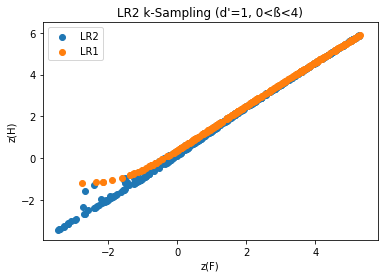

In [134]:
k_range = {'k_min': -4, 'k_max': 4, 'k_num': 1000}
zf2_vals, zh2_vals = diff_model.sample_k1_k2_values_to_z(k_range, 1, 500)
zf1_vals, zh1_vals = diff_model.sample_k_values_to_z(k_range, 1, 500)

plt.scatter(zf2_vals, zh2_vals, label='LR2')
plt.scatter(zf1_vals, zh1_vals, label='LR1')
plt.xlabel('z(F)')
plt.ylabel('z(H)')
plt.title('LR2 k-Sampling (d\'=1, 0<ß<4)')
plt.legend()
#plt.savefig('results/cc2_sampling_smallk.png')

/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars
/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in double_scalars
/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in double_scalars
  
/Users/alexyu/.pyenv/versions/3.6.0/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/Users/a

KeyboardInterrupt: 

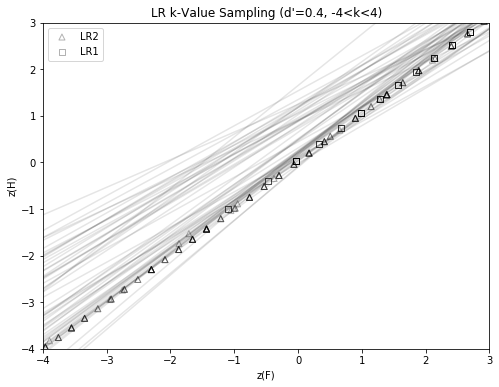

In [131]:
# LR1/LR2 k-sampling using subject slope-intercept data

k_range = {'k_min': 0, 'k_max': 4, 'k_num': 101}
dp_range = {'dp_min': 0, 'dp_max': 2, 'dp_num': 11}

mb_data = pd.read_csv('data/mb_data.csv', index_col=0)
x_vals = [-4, 3]

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zf2_vals, zh2_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 500)
    zf1_vals, zh1_vals = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zf2_vals, zh2_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='LR2')
    plt.scatter(zf1_vals, zh1_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='LR1')
    for index, row in mb_data.iterrows():
        slope, intercept = row['Slope'], row['Intercept']
        pred_vals = [slope * n + intercept for n in x_vals]
        plt.plot(x_vals, pred_vals, color='black', alpha=0.1)
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'LR k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()

In [136]:
# LR k-sampling w/ subject z-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 401}
dp_range = {'dp_min': 0.2, 'dp_max': 2.7, 'dp_num': 26}

data = pd.read_csv('data/z_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    zf2_vals, zh2_vals = diff_model.sample_k1_k2_values_to_z(k_range, dp, 1000)
    zf1_vals, zh1_vals = diff_model.sample_k_values_to_z(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(zf2_vals, zh2_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='LR2')
    plt.scatter(zf1_vals, zh1_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='LR1')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'] in explained_subs:
            alpha = 0.3
            zf_vals = sub_data.filter(like='ZF').tolist()
            zh_vals = sub_data.filter(like='ZH').tolist()
            plt.plot(zf_vals, zh_vals, color='black', alpha=alpha)    
    
    plt.xlabel('z(F)')
    plt.ylabel('z(H)')
    plt.xlim(-4, 3)
    plt.ylim(-4, 3)
    plt.title(f'LR k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>

In [137]:
# LR k-sampling w/ subject p-value data

k_range = {'k_min': -4, 'k_max': 4, 'k_num': 401}
dp_range = {'dp_min': 0.2, 'dp_max': 2.7, 'dp_num': 26}

data = pd.read_csv('data/p_data.csv', index_col=0)
x_vals = [-4, 3]
explained_subs = ['BYZ','HP','HYP','SL','YPL','YJC','ZJT','QP','TCD','YCX','ZXL','ZY','CW','WJ','RSL','SJ2','LXL','SYB','WY','YJX','CY','GJ','JYN','SJ','SXQ','ZQT']

for dp in np.linspace(dp_range['dp_min'], dp_range['dp_max'], dp_range['dp_num']):
    pf2_vals, ph2_vals = diff_model.sample_k1_k2_values_to_p(k_range, dp, 1000)
    pf1_vals, ph1_vals = diff_model.sample_k_values_to_p(k_range, dp, 500)

    plt.gcf().set_size_inches(8, 6)
    plt.scatter(pf2_vals, ph2_vals, alpha=0.3, marker='^', facecolor="none", edgecolor='black', label='LR2')
    plt.scatter(pf1_vals, ph1_vals, alpha=0.3, marker='s', facecolor="none", edgecolor='black', label='LR1')

    for i in range(len(data)):
        sub_data = data.iloc[i]
        if sub_data['Subject'].replace('\'', "") in explained_subs:
            alpha = 0.3
            pf_vals = sub_data.filter(like='PF').tolist()
            ph_vals = sub_data.filter(like='PH').tolist()
            plt.plot(pf_vals, ph_vals, color='black', alpha=alpha)    
    
    plt.xlabel('p(F)')
    plt.ylabel('p(H)')
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.title(f'LR k-Value Sampling (d\'={round(dp,2)}, -4<k<4)')
    plt.legend()
    plt.savefig(f'results/k_sampling{round(dp,2)}.png')
    plt.clf()


<Figure size 576x432 with 0 Axes>